<a href="https://colab.research.google.com/github/Akaike-kiyomasa/201230/blob/main/flower_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Flower dataset download

In [5]:
import os
import requests

# ダウンロードするファイルのURL
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# 保存先のディレクトリとファイル名を指定
# save_dir = "./flower_photos"  # 保存先ディレクトリ
# save_file = os.path.join(save_dir, "flower_photos.tgz")  # 保存ファイルのパスを作成（存在しない場合）
# os.makedirs(save_dir, exist_ok=True)

save_dir = "/content"
save_file = os.path.join(save_dir, "flower_photos.tgz")

# ファイルをダウンロードして保存
response = requests.get(url)
with open(save_file, 'wb') as f:
    f.write(response.content)

print("ファイルがダウンロードされました。")


ファイルがダウンロードされました。


In [6]:
import tarfile
# Tarファイルを解凍
with tarfile.open(save_file, 'r:gz') as tar:
    tar.extractall(save_dir)

print("Tarファイルが解凍されました。")

Tarファイルが解凍されました。


### Check images

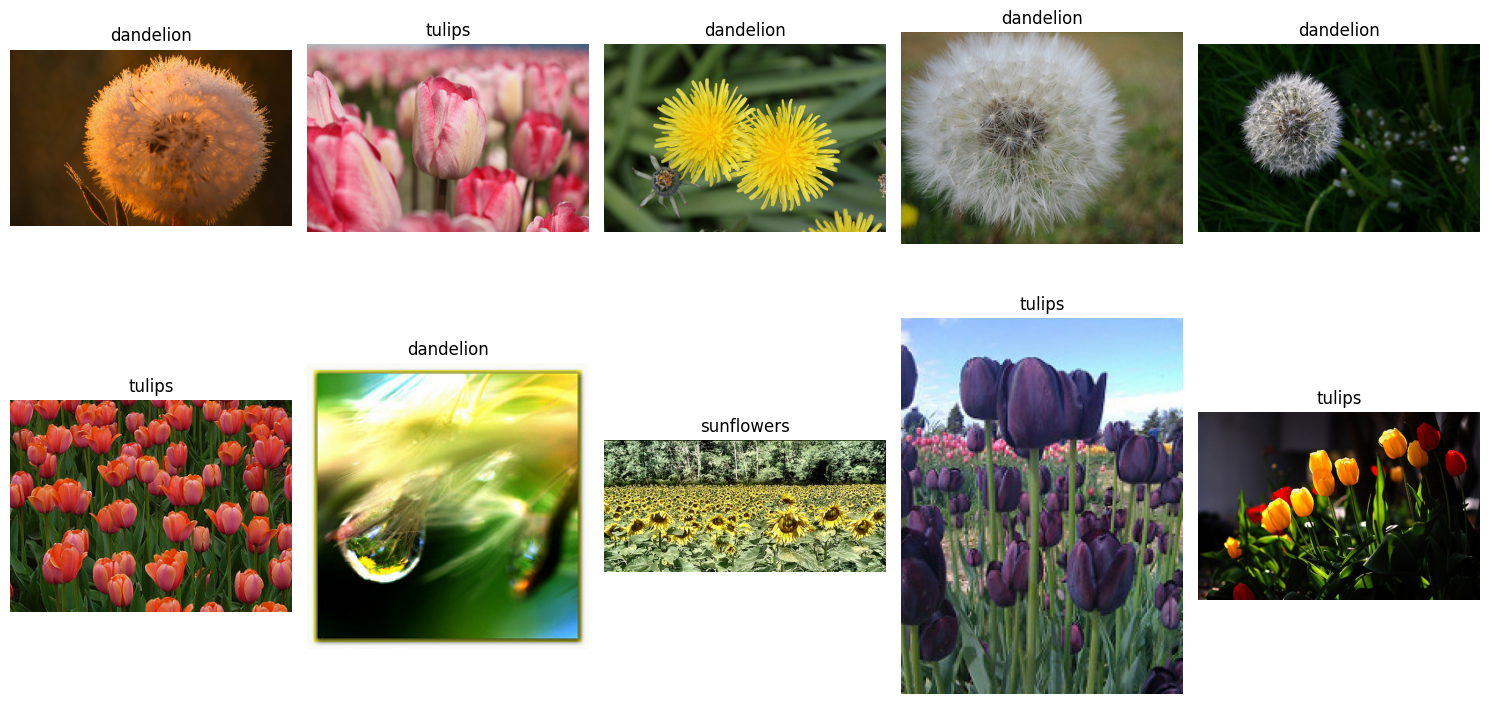

In [18]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# データセットディレクトリとクラス名を指定
data_dir = "/content/flower_photos"  # データセットディレクトリ
class_names = os.listdir(data_dir)

# 10枚の画像をランダムに選択して描画
plt.figure(figsize=(15, 8))  # 画像の描画領域を設定

for i in range(10):
    while True:
        # ランダムにクラスを選択
        selected_class = random.choice(class_names)

        # クラスディレクトリ内のエントリ（ファイルまたはディレクトリ）を取得
        class_dir = os.path.join(data_dir, selected_class)
        entries = os.listdir(class_dir)

        # ランダムにエントリを選択
        selected_entry = random.choice(entries)

        # 選択されたエントリのパスを作成
        selected_entry_path = os.path.join(class_dir, selected_entry)

        # ディレクトリまたはファイルかどうかを確認してから処理
        if os.path.isdir(selected_entry_path) or os.path.isfile(selected_entry_path):
            break

    # 選択されたエントリが画像ファイルであるかどうかを確認
    if os.path.isfile(selected_entry_path) and selected_entry_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # 画像を読み込み
        image = Image.open(selected_entry_path)

        # 10枚の画像を横に並べて表示
        plt.subplot(2, 5, i + 1)  # 2行5列の描画領域のi+1番目
        plt.imshow(image)
        plt.title(selected_class)
        plt.axis('off')  # 軸を非表示にする

plt.tight_layout()
plt.show()
